# Import des modules et des jeux de données

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # dataframe

from datetime import datetime
import math

import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
  
from scipy.special import boxcox1p # for some statistics transformation
from scipy.stats import boxcox_normmax
from scipy.stats import randint
from sklearn.preprocessing import PowerTransformer
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
from scipy.stats import normaltest
from scipy import stats
from scipy.stats import norm ,skew
from pylab import rcParams

from sklearn.preprocessing import RobustScaler #scorer cross validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


from bayes_opt import BayesianOptimization #optimisation tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor #machine learning
import xgboost as xgbm
from xgboost import DMatrix
from lightgbm import LGBMRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from pycaret.regression import *
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import VotingRegressor


C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#   Statistiques descriptives / Data Visualisation

## Import / Manipulation

On utilise les données bruts dans le cadre de cette analyse descrpitive

In [3]:
houses = pd.read_csv('C:/Users/Hype/PyBooks/projet dov/train.csv', sep=',')
dfs = pd.read_csv('C:/Users/Hype/PyBooks/projet dov/train.csv', sep=',')

On sépare nos variable numérique et caractère, on remplace les valeurs manquante et on creer des dummies

In [4]:
df_test = houses

In [5]:
dft = pd.DataFrame()
dfo = pd.DataFrame()
dfn = pd.DataFrame()

In [7]:
for el in df_test.columns:
    if df_test[el].dtype == object:
        pass
        #df_test[el] = df_test[el].fillna('nan')
    else:
        df_test[el] = df_test[el].fillna(0)

In [9]:
for el in df_test.columns:
    if df_test[el].dtype == object:
        t4 = pd.get_dummies(df_test[el], prefix=el)
        dfo = pd.concat([dfo, t4], axis=1)
    else:
        dfn = pd.concat([dfn, df_test[el]], axis=1)           

## Cluestering

In [577]:
data_targ = dfn

In [578]:
data_targ.drop(['SalePrice'],axis=1)
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)

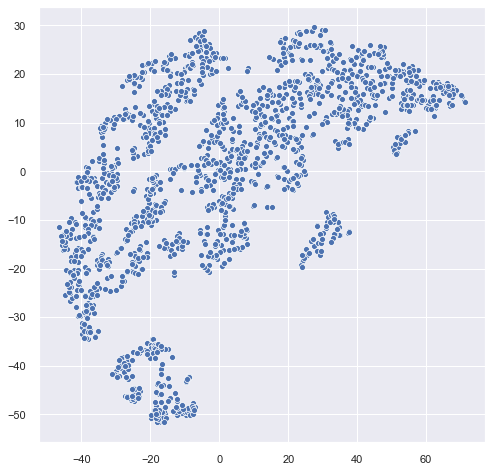

In [579]:
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

In [146]:
pt = PowerTransformer(method='yeo-johnson')

pt.fit(dfn)
#transformated_data_y = pt.transform(dfn)
#pt.fit(df_con)
yeo_data = pt.transform(dfn)

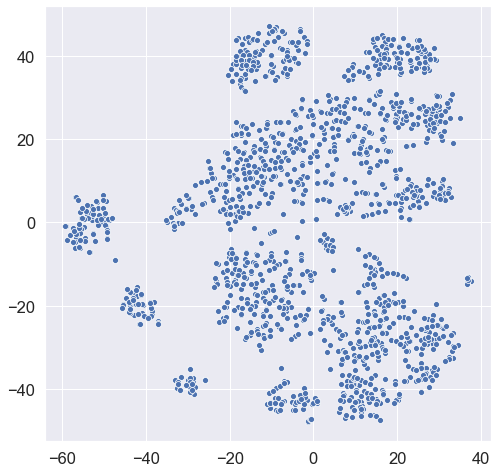

In [147]:
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(yeo_data)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1]);

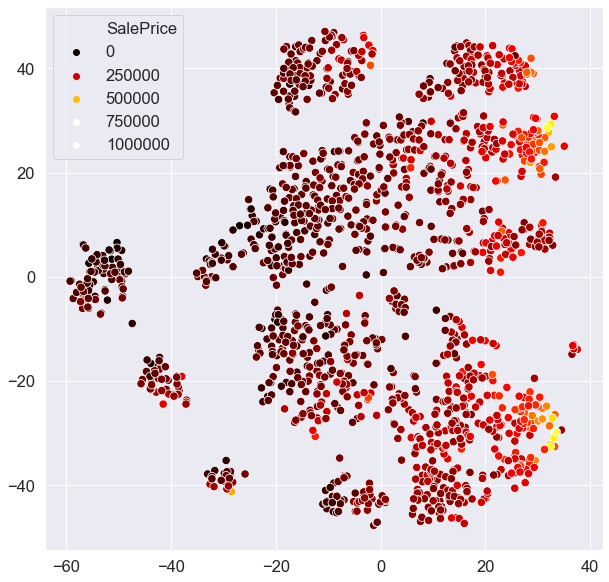

In [159]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=dfn['SalePrice'],s=70,palette="hot");#,palette="RdBu");

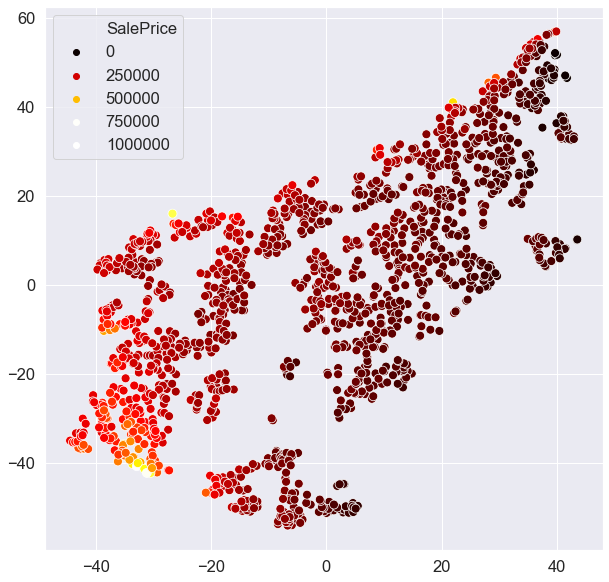

In [136]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.scatterplot(x=res_tsne[:,0],y=res_tsne[:,1],\
                     hue=dfn['SalePrice'],s=70,palette="hot");#,palette="RdBu");

## Visualisation Outliers

C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hype\Ana

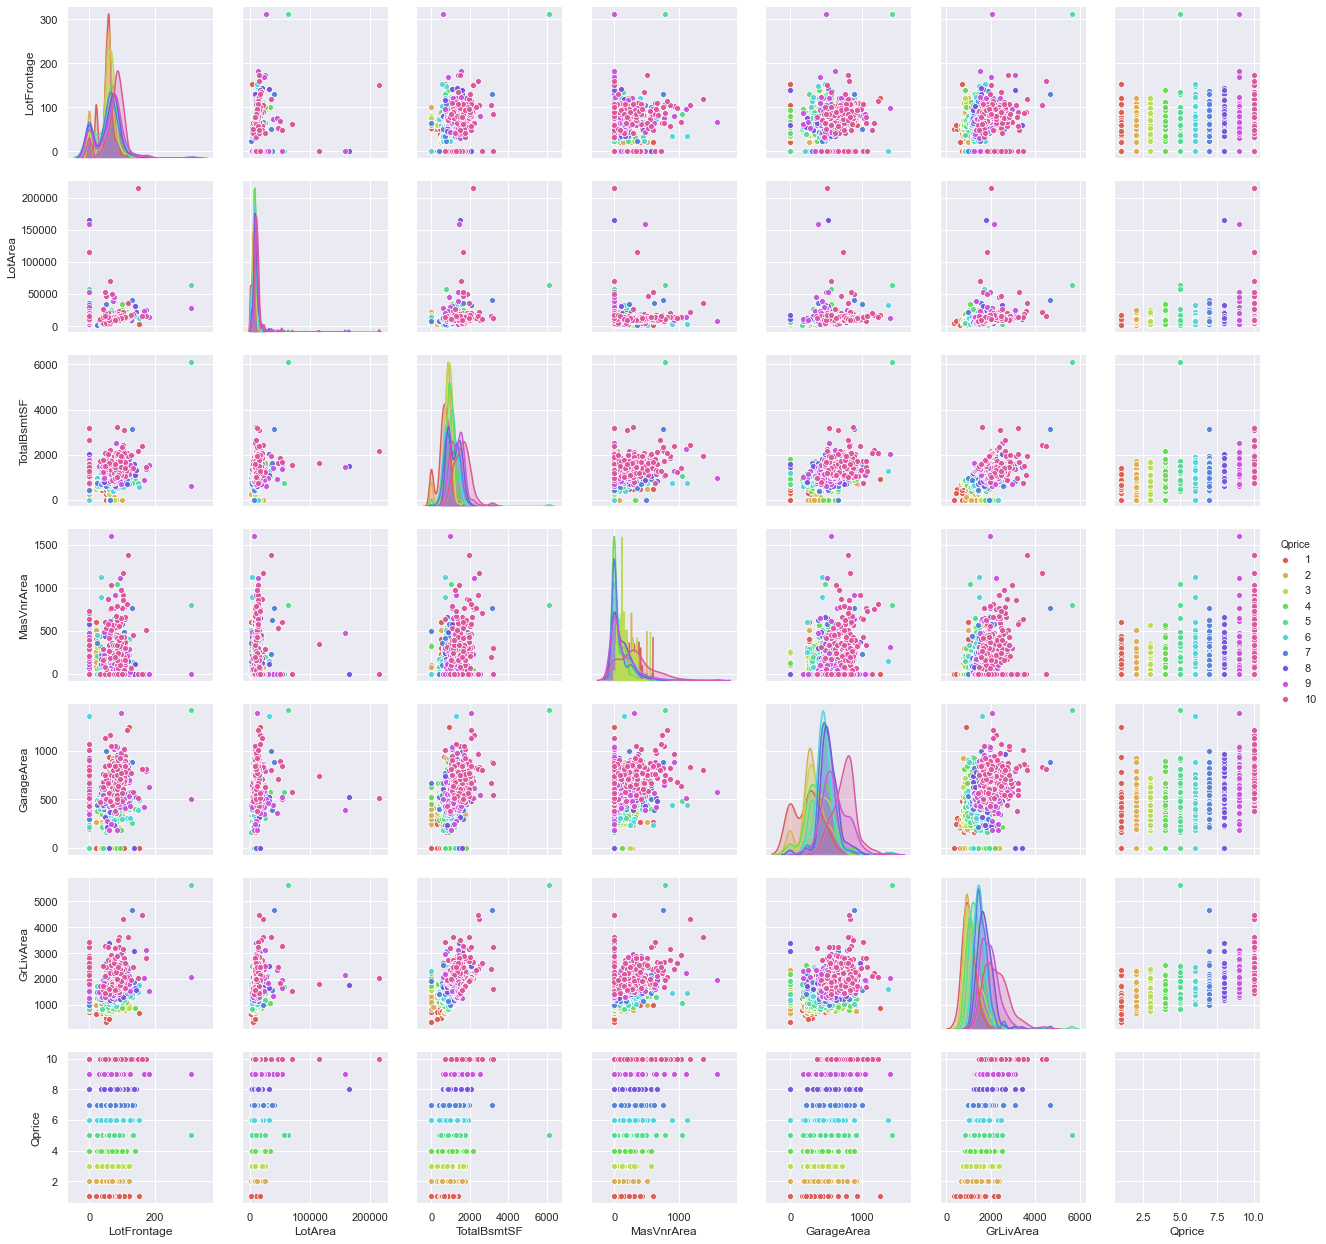

In [10]:
tt = dfn

tt['Qprice'] = pd.qcut(tt.SalePrice, 10, labels=[ 1, 2, 3,4,5,6,7,8,9,10])

tt = tt[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'MasVnrArea', 'GarageArea', 'GrLivArea', 'Qprice']]

sns.pairplot(tt, hue='Qprice', palette='hls')

## Correlation

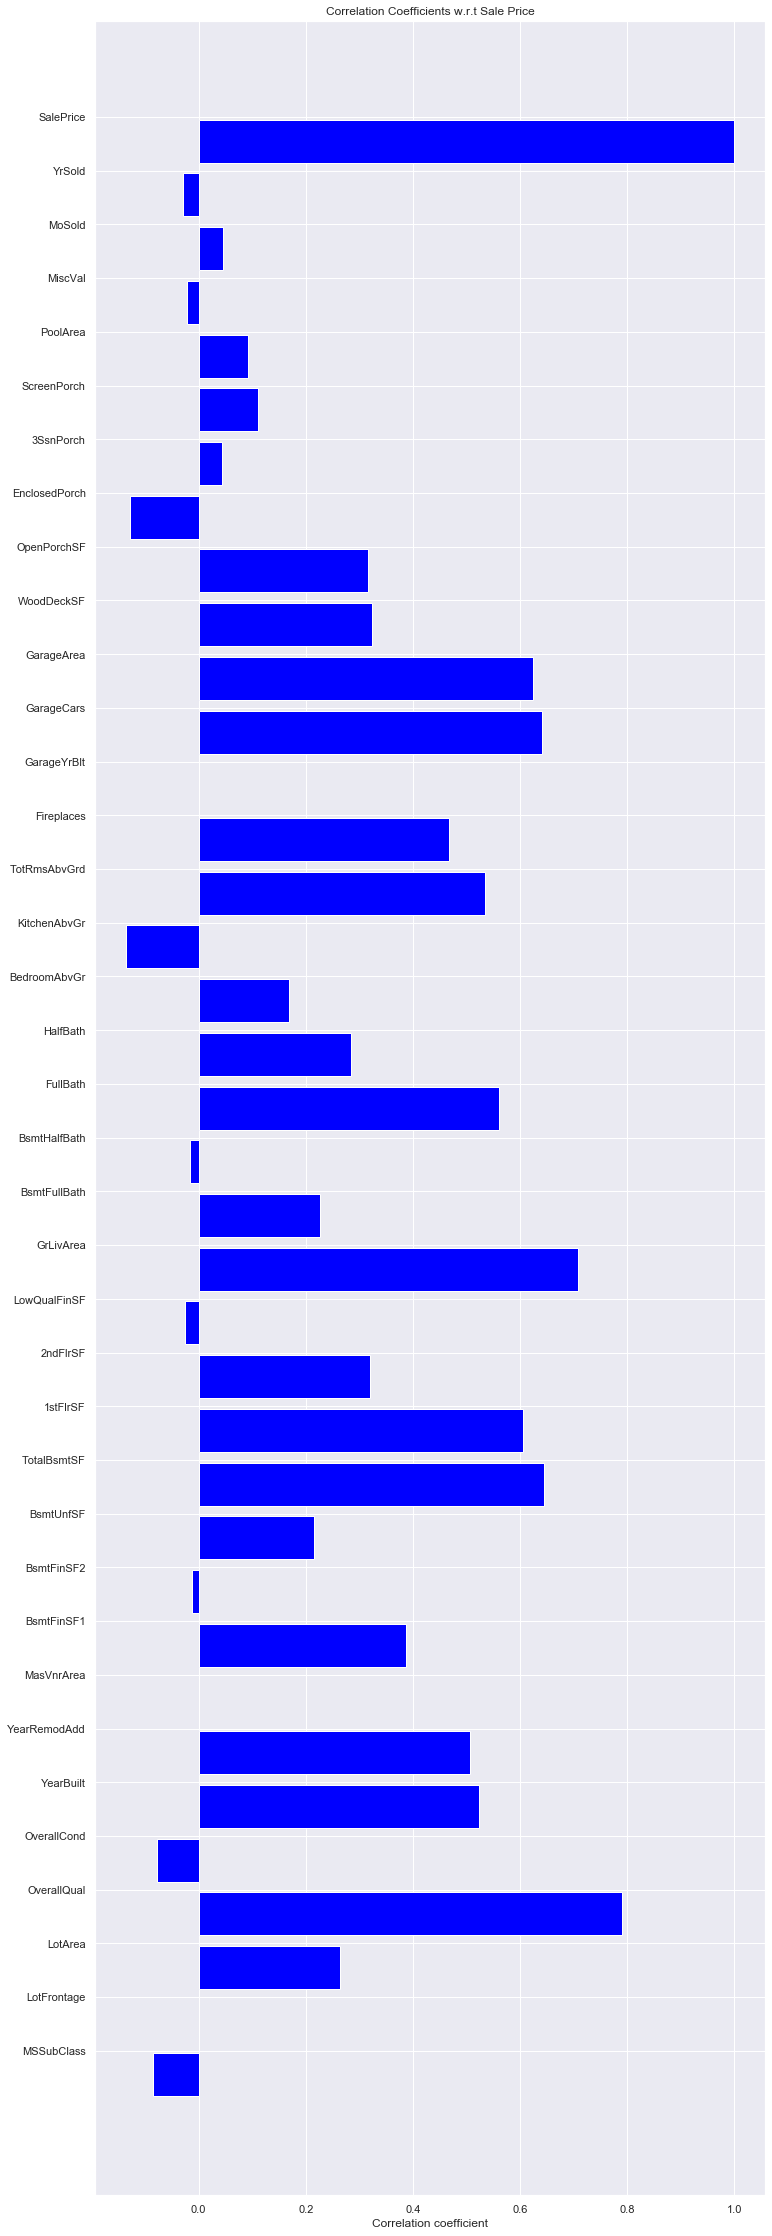

In [90]:
#entre sales prices et l'ensembles des autres variables

num_feat=houses.columns[houses.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='blue')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

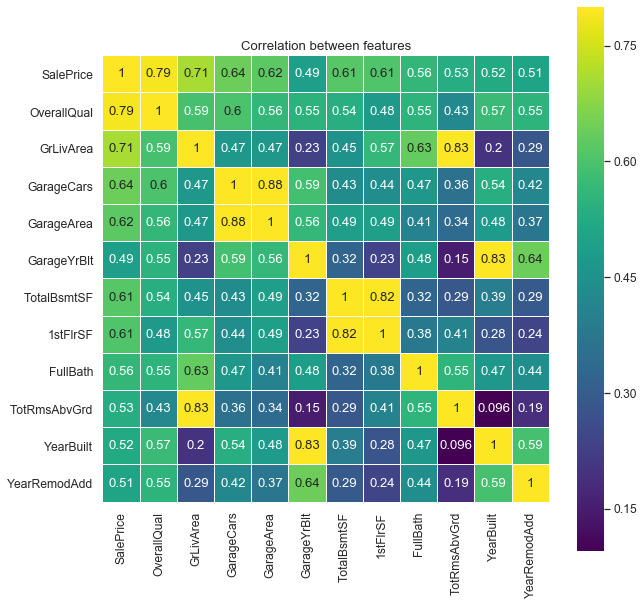

In [125]:
#matrice des corrélations

corrMatrix=houses[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

One of the highest correlation for salesprices is GrlivArea(Above grade (ground) living area square feet) with a coefficient around 0.71 that mean this is the variable that impact the most the salesprice with overqual (0.79). The lowest is for the variable GarageYrBlt (Year garage was built) with a coefficient estimated to 0.49. 

## Distribution du prix

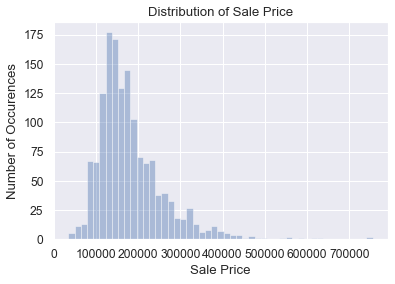

In [124]:
#distribution de sale price

sns.distplot(houses['SalePrice'], color="b", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");

In [123]:
#coef stat utiles
#skewness  
houses['SalePrice'].skew()
#kurtosis
houses['SalePrice'].kurt()

6.536281860064529

The majority of house that was buy is betwern 100000$ and 200000$. The skewnees is egal to 1.88(positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left) and the kurtosis is egal to 6.53 also if the number is greater than +1, the distribution is too peaked

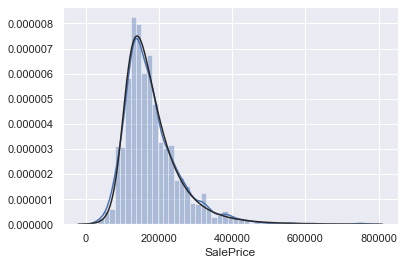

In [32]:
sns.distplot(houses["SalePrice"], kde=True, fit=stats.johnsonsu )

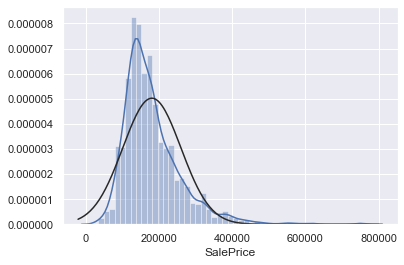

In [33]:
sns.distplot(houses["SalePrice"], kde=True, fit=stats.norm )

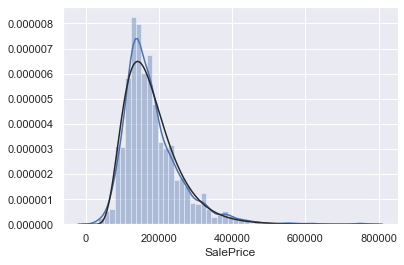

In [54]:
sns.distplot(houses["SalePrice"], kde=True, fit=stats.lognorm )

On peut voir clairement içi que le prix des maisons ne suit pas une distribution gaussienne (courbe en noir). Par contre la distribution de Johnson fit parfaitement avec la distribution de notre variable prix

C:\Users\maserati\Anaconda3\envs\lab\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


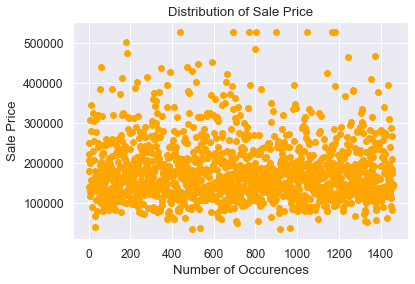

In [121]:
#analyse de la distribution pour distinguer les outliers
upperlimit = np.percentile(houses.SalePrice.values, 99.5)
houses['SalePrice'].ix[houses['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(houses.shape[0]), houses["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

The majority of the concentration of salesprices is between  0-400000 but the outliers look to be above 500000$ by house prices. Also there is like 9 outliers. 

## Visualisation sur les missing

In [122]:
#Recuper la base avec les outliers
houses = dfs

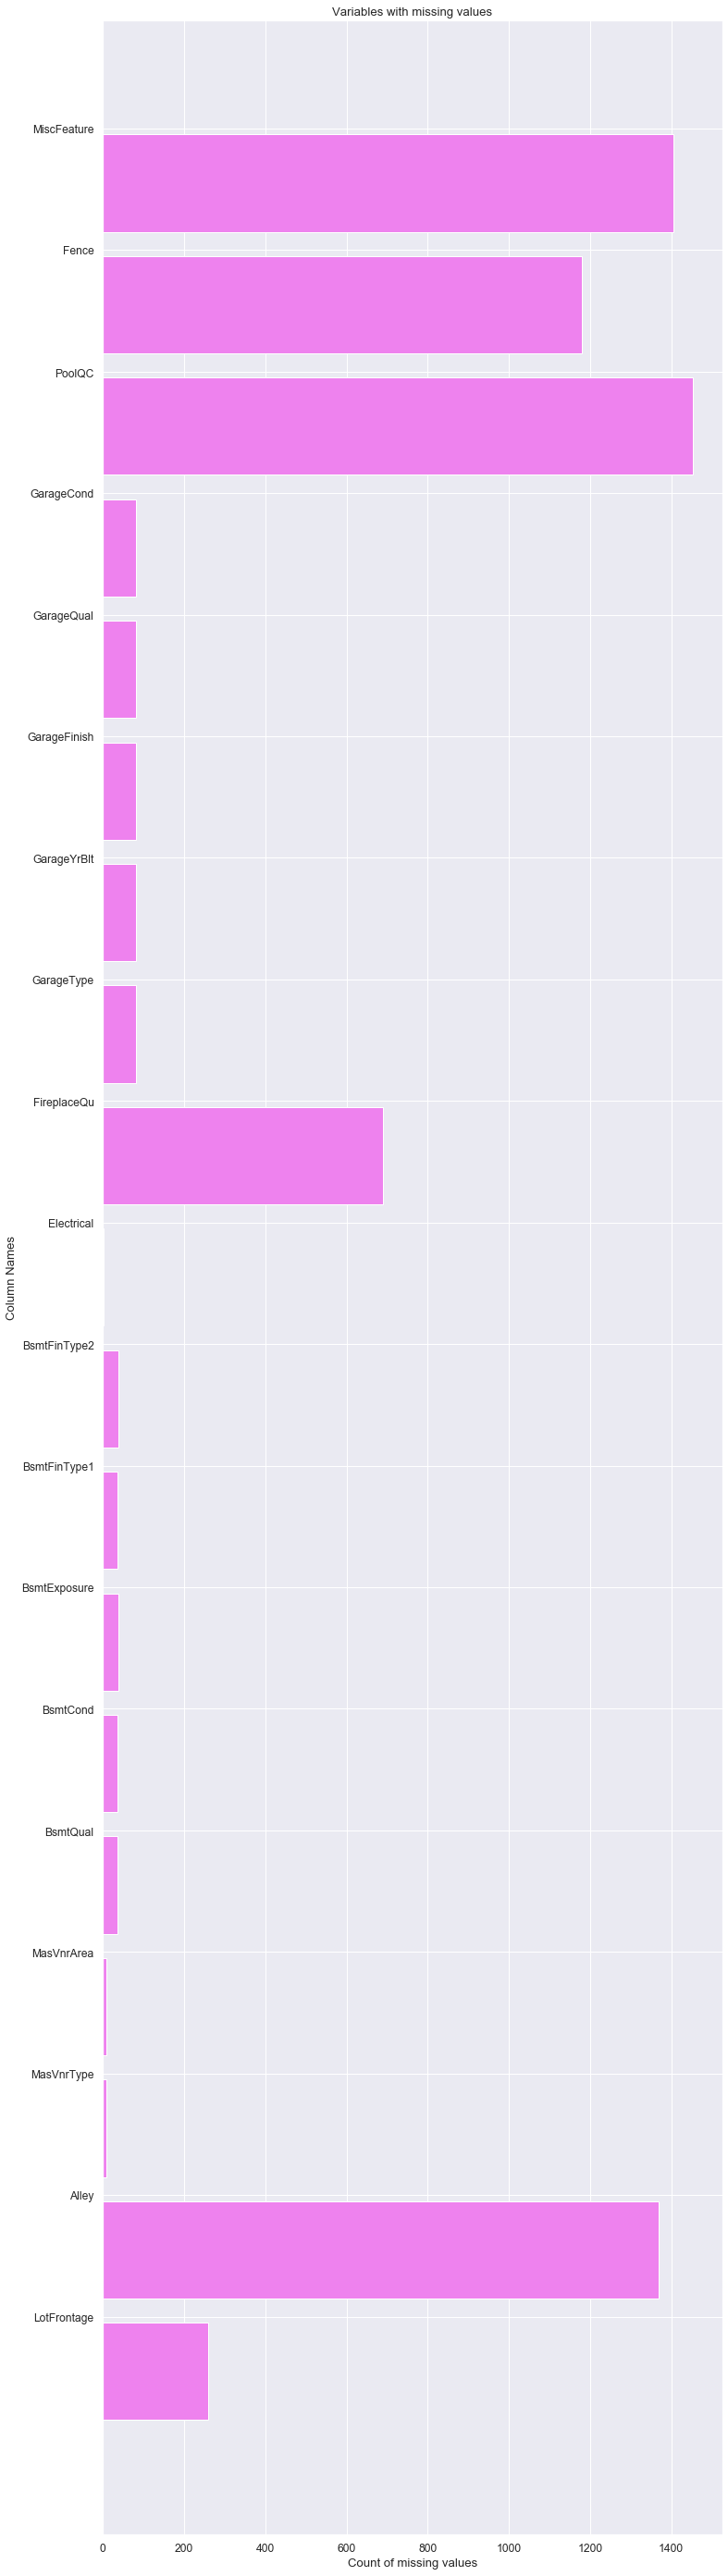

In [78]:
#analyse sur les missings
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(houses[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

Miscfeature, fence,PoolQC and alley are the only variables that got over 1000 missing count values. 

## Visualisation

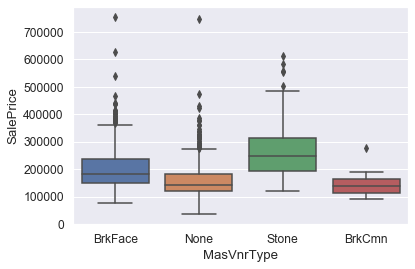

In [79]:
#composition de la maison (brick,stone...) par rapport au prix
sns.boxplot("MasVnrType","SalePrice",data=houses);

The extremety of the boxplots lower quartile and upperquartile, the line inside is the median and the extremity outside of the boxplots is lower whisker and upper whisker. Whisker represent the min and max. The points are the outliers. 

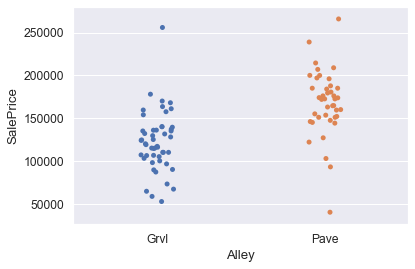

In [80]:
#Type of alley access to property
sns.stripplot(x=houses["Alley"], y=houses["SalePrice"],jitter=True);

In general, the sale price is more higher if the alley acces is composed by pave than gravel. Also, pave make increase the salesprices.

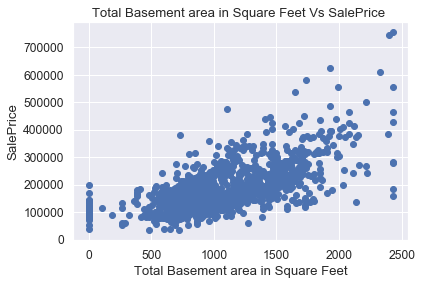

In [83]:
#largeur du sous-sol par rapport au prix 

plt.scatter(houses["TotalBsmtSF"],houses["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

Even if there are some outliers, more the total basement in square feet is high and more the sale price will increase

C:\Users\maserati\Anaconda3\envs\lab\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\maserati\Anaconda3\envs\lab\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


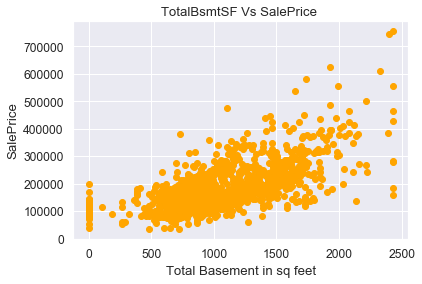

In [82]:
upperlimit = np.percentile(houses.TotalBsmtSF.values, 99.5)
houses['TotalBsmtSF'].ix[houses['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(houses.TotalBsmtSF, houses["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

C:\Users\maserati\Anaconda3\envs\lab\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


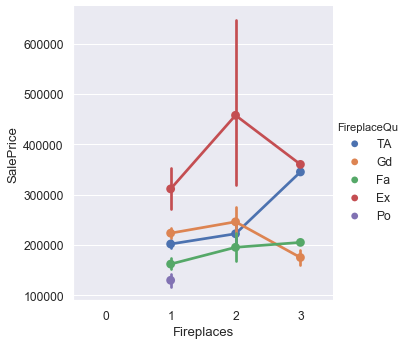

In [81]:
#fireplaces : Number of fireplaces

sns.factorplot("Fireplaces","SalePrice",data=houses,hue="FireplaceQu");

#Having 2 fireplaces increases house price and fireplace of Excellent quality is a big plus

Having 2 fireplaces increases house price and fireplace of Excellent quality is a big plus.

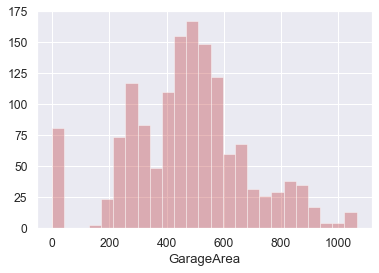

In [70]:
#garages et sales prices

sns.distplot(houses["GarageArea"],color='r', kde=False);

C:\Users\maserati\Anaconda3\envs\lab\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


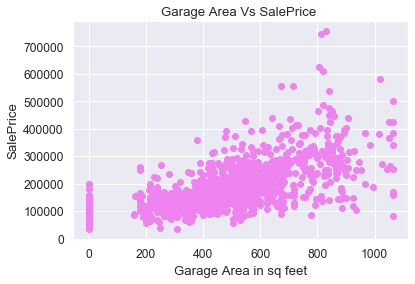

In [38]:
#GarageArea sans les outliers.
upperlimit = np.percentile(houses.GarageArea.values, 99.5)
houses['GarageArea'].ix[houses['GarageArea']>upperlimit] = upperlimit

plt.scatter(houses.GarageArea, houses["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

There is the garage area variable without the outliers. Also, more the garage are is high in square feet and more the sale price will be high too

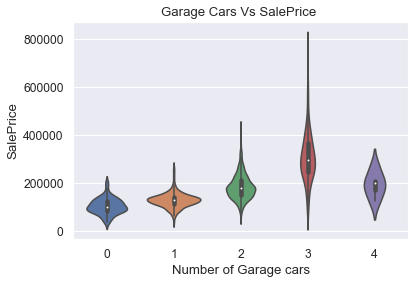

In [37]:
sns.violinplot(houses["GarageCars"],houses["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

#le nombre de garage a voiture fait augmenter le prix par rapport au point moyen mais sa dispersion peut etre 
#extrement étalé

The number of car garages increases the price compared to the average point but its dispersion can be extremely spread out. 

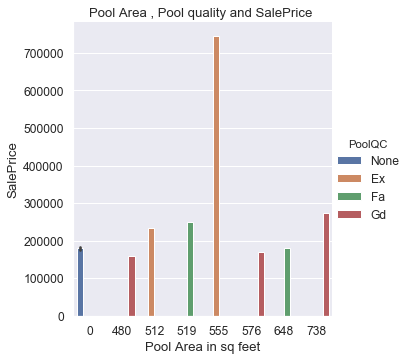

In [36]:
#piscine et sales prices

#If PoolArea is 0, that means that house doesn't have a pool.
#So we can replace PoolQuality with None.
houses["PoolQC"] = houses["PoolQC"].fillna('None')
sns.factorplot("PoolArea","SalePrice",data=houses,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");

If PoolArea is 0, that means that house doesn't have a pool also we can replace PoolQuality with None. Pool quality   Ex	Excellent, Gd	Good,, Fa	Fair,  NA NoPool
For a sales prices around 500000$, the pool quality awarded excellent.


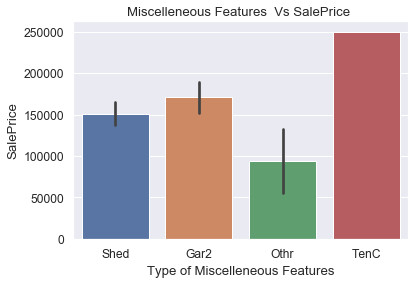

In [34]:
#MiscFeature: Miscellaneous feature not covered in other categories
       #Elev	Elevator
       #Gar2	2nd Garage (if not described in garage section)
       #Othr	Other
       #Shed	Shed (over 100 SF)
       #TenC	Tennis Court
       #NA	None
        
        

sns.barplot(houses["MiscFeature"],houses["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");


#Avoir un court de tennis impact le prix bien plus que d'avoir un second garage

Miscellaneous feature not covered in other categories
       Elev	Elevator, Gar2	2nd Garage (if not described in garage section), Othr	Other, Shed	Shed (over 100 SF), TenC	Tennis Court, NA	None
Having a tennis court impacts the price much more than having a second garage


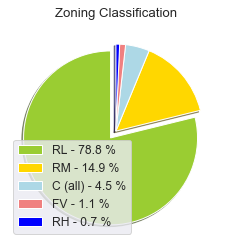

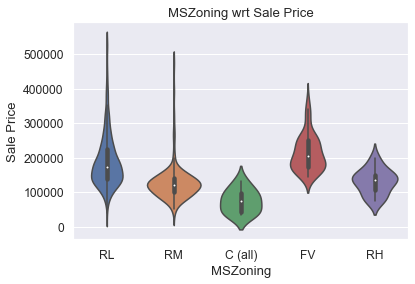

In [71]:
#visualisation par type de zones:
#MSZoning: Identifies the general zoning classification of the sale.
       #A	Agriculture
       #C	Commercial
       #FV	Floating Village Residential
       #I	Industrial
       #RH	Residential High Density
       #RL	Residential Low Density
       #RP	Residential Low Density Park 
       #RM	Residential Medium Density

labels = houses["MSZoning"].unique()
sizes = houses["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()



sns.violinplot(houses.MSZoning,houses["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

#Les residences avec une faible densité de terrein represente 78.8% de l'échantillon.
#La forte dispersion des RL sur le prix peut expliquer la variation globale du prix des maisons

Residences with a low soil density represent 78.8% of the sample.
The strong dispersion of RL on the price may explain the overall variation in house prices. 


$ 120.57287807326834


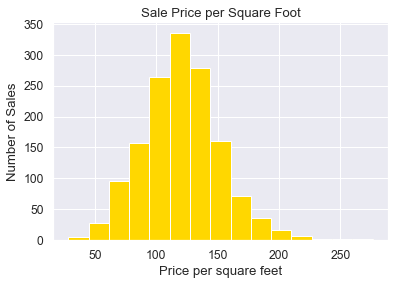

In [87]:
#Distribution du prix par square feet calculer en faisant prix de vente/ nb square feet

houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
plt.hist(houses['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

#Plus le nombre de metre carré augmente, Plus le prix du metre carré augmente jusqu'a environs 130 puis diminue

#Average Sale Price per square feet 
print("$",houses.SalePriceSF.mean())

#Le prix moyen du sq feet est de 120.57$

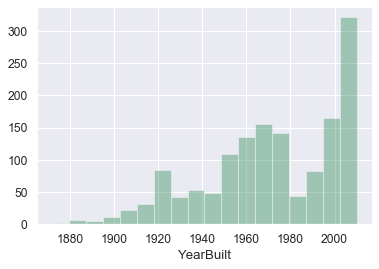

In [94]:
#Building , remodelling years and age of house

sns.distplot(houses["YearBuilt"],color='seagreen', kde=False);

annees 1984.8657534246574


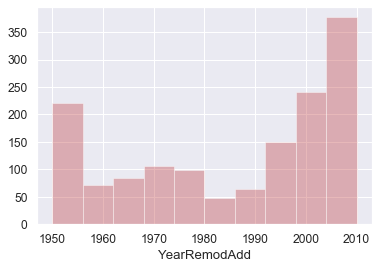

In [95]:
sns.distplot(houses["YearRemodAdd"].astype(int),color='r', kde=False);
print("annees",houses.YearRemodAdd.mean())

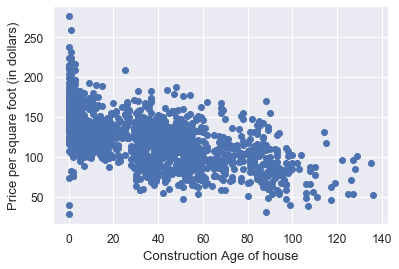

In [96]:
houses['ConstructionAge'] = houses['YrSold'] - houses['YearBuilt']
plt.scatter(houses['ConstructionAge'], houses['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");

#Plus l'age de la maison est élevé est plus le prix de la maison est faible. 
#Cela s'explique par l'age moyen de la restauration au alentour de 1985 ce qui a pour consequences de faire reduire le prix des maisons

The higher the age of the house, the lower the price of the house.
This is explained by the average age of the restoration around 1985 which has the consequences of reducing the price of houses. 


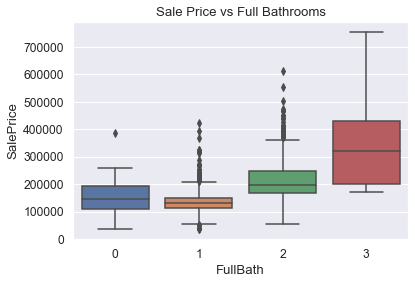

In [97]:
#full bathrooms analyse vs sales prices
sns.boxplot(houses["FullBath"],houses["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

The sale price increase with the number of fullbath, but some outliers reach the same level of sale price between getting 2 or 3 fullbath by example.

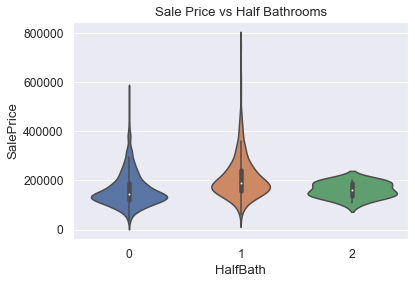

In [98]:
#half bathrooms
sns.violinplot( houses["HalfBath"],houses["SalePrice"])
plt.title("Sale Price vs Half Bathrooms");

The number of halfbath does not impact the sale price at all.

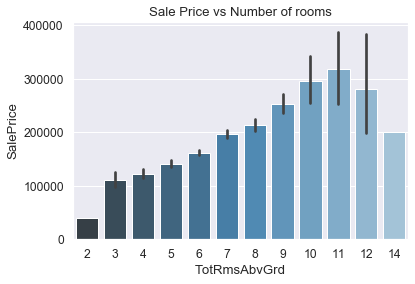

In [100]:
#total rooms above grave
sns.barplot(houses["TotRmsAbvGrd"],houses["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");

The number of rooms make the sale price of houses increasing until aproximately 11 rooms.

C:\Users\maserati\Anaconda3\envs\lab\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


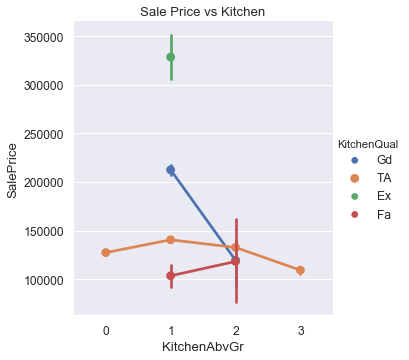

In [101]:
#quality of kitchen

sns.factorplot("KitchenAbvGr","SalePrice",data=houses,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");

The kitchen awarded as excellent is way higher (300000-350000$) than just a good kitchen (120000-230000$) in term of sale prices.

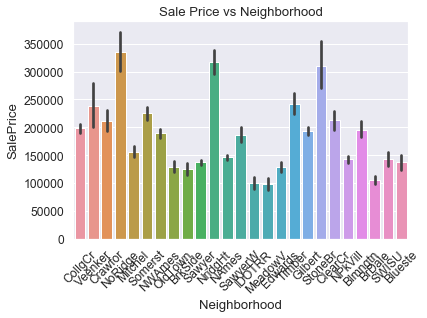

In [102]:
#Neighborhood: Physical locations within Ames city limits

plt.xticks(rotation=45) 
sns.barplot(houses["Neighborhood"],houses["SalePrice"])
plt.title("Sale Price vs Neighborhood");

Certains locations got a sale price more higherthan some others. 

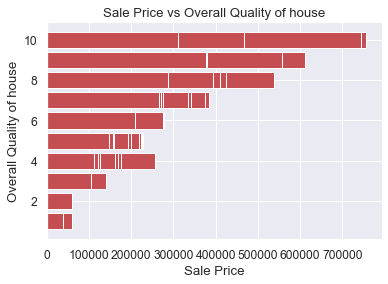

In [104]:
#Overall Quality

plt.barh(houses["OverallQual"],width=houses["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");

As we can see, more the overall quality is high and more the price is high.

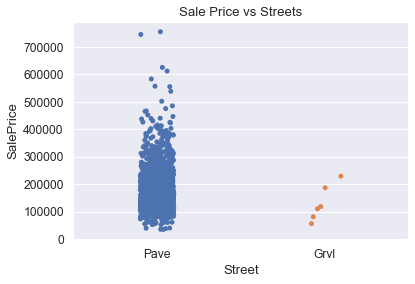

In [127]:
#most streets are paved lets visulalize it
sns.stripplot(x=houses["Street"], y=houses["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");

# Préparation du jeux de donnée

In [11]:
train = df = pd.read_csv('C:/Users/Hype/PyBooks/projet dov/train.csv', sep=',')
test = pd.read_csv('C:/Users/Hype/PyBooks/projet dov/test.csv', sep=',')

On sépares la variable identification de notre jeux de donnée car elle ne nous ai pas utile pour la régréssion

In [12]:
train_ID = train['Id']
test_ID = test['Id']

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

## Logarithme du prix

Précédemment, nous avons dans la partie descriptive que la distribution du prix n'étais pas normalisé. En appliquant un logarithm sur le prix
nous allons normaliser le prix et améliorer les performances de nos prédictions. 

Ensuite on isole notre target variable et on concatène notre jeux de donnée d'entrainement et de test pour pouvoir appliquer les mêmes traitements dessus.

In [13]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

## Conversion de type et remplacement des valeurs manquantes

Plusieurs de nos variables non numériques sont enregistré entant que nombres, nous les convertissons donc en string. Ensuite nous remplacons les valeurs manquantes soit par 0, none ou alors par la modalité qui apparait le plus souvent. On enregistre aussi dans une liste nos variables de type object.

In [14]:
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features["PoolQC"] = features["PoolQC"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

## Création de nouvelles features

Dans cette partie, on supprime les variables inutiles 'Utilities', 'Street', 'PoolQC' (toujours la même modalité présente). 

Ensuite on créer de nouvelles variables en fusionnant des variables existantes, par exemple on créer une variable numérique du nombre de salle de bain au total 
comprenant les salles de bain au sous sol ainsi que les demi-salle de bain.


On remplace les valeurs manquante par 0 et on enregistre dans une liste nos variable numérique.

In [15]:
features = features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

features['YrBltAndRemod']=features['YearBuilt']+features['YearRemodAdd']
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

## Standardisation et Normalisation des données

Dans des données asymétriques, la région de queu d'une distribution peut agir comme une valeure abérante pour le modèle statistique ce qui affecterait négativiement le modèle statistique, en particulier les modèles basées sur la régression. Il est donc nécéssaire de transformer les données asymétrique à l'aide par exemple d'une transformation logarithmique ou bien d'un méthode de normalisation type Box Cox pour qu'elle se rapproche d'une gaussienne. De plus les algorithme de machine learning sont plus performant lorque les données ont été normalisées.

On assigne nos variable numérique à numtest, puis on remplace les 0 par 0.1 car sinon on ne peut normaliser les données à travers la méthode de Box Cox (données > 0)

In [16]:
numtest = round(features[numerics],1).replace(0, 0.1)

y_test = y.to_numpy().reshape(-1,1)

pt = PowerTransformer(standardize = True , method='box-cox')

pt.fit(numtest)
transformated_data_x_cox = pt.transform(numtest)
pt.fit(y_test)
transformated_data_y_cox = pt.transform(y_test)

C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


On est passé d'un dataframe pandas à un array numpy, on va donc récupéré nos noms de colonnes et rebasculé nos données en Dataframe. On aurait pu aussi utiliser un pipeline pour transformer nos données et appliquer directement l'algorithme de machine learning dessus.

In [17]:
df_con2 = pd.DataFrame(transformated_data_x_cox)

i=0
for el in numerics:    
    df_con2.rename(columns={i : el}, inplace = True)
    i=i+1

y = pd.DataFrame(transformated_data_y_cox, columns=['SalePrice'])

col=[]
for i in features.columns:
    if i in df_con2.columns:
        features[i] = df_con2[i]

On peut constater à travers ces graphiques que la normalisation de nos données à permis de réduire l'impact des outliers

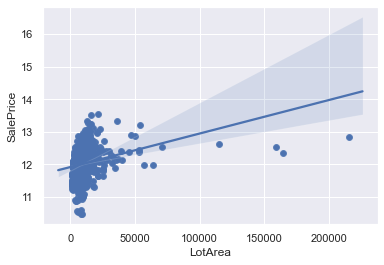

In [53]:
sns.scatterplot(x=train['LotArea'] , y= train["SalePrice"])
sns.regplot(x=train['LotArea'], y=train["SalePrice"] )

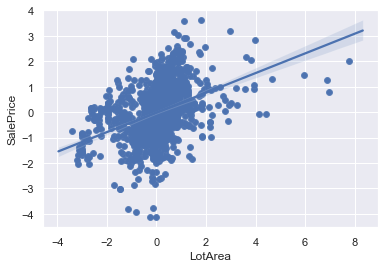

In [15]:
sns.scatterplot(x=features['LotArea'][:1460] , y= y["SalePrice"])
sns.regplot(x=features['LotArea'][:1460], y=y["SalePrice"] )

## Création de variable catégorielle

Dans cette partie on simplifie les features en mettant un si on possède par exemple une piscine ou un garage et 0 sinon.
Puis on creer des variables catégorielle pour chacune de nos modalités pour les variables de type objet.
Et enfin on regarde dans toutes nos features si elles ont de la variabilité, si elle possèdent toujours pratiquement la même modalité, on la supprime.

In [18]:
# simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(features.shape)
final_features = pd.get_dummies(features).reset_index(drop=True)
print(final_features.shape)

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()

(2919, 86)
(2919, 334)
X (1460, 334) y (1460, 1) X_sub (1459, 334)


## Outliers

Dans cette partie, nous allons visualiser une partie des outliers dans notre jeux d'entrainement. En premier lieu en visualisant nos données nous pouvons penser qu'il y a des valeurs abérantes pour la surface habitable en pied carré (> 4500). Cependant ces valeurs qui sont en dehors du nuage de points ne doivent pas être supprimée car ces valeurs extrèmes nous apportent de l'information et on peut retrouver ces mêmes caractéristiques dans notre jeux de test. Si on supprime par exemple les valeurs GrLivArea > 4500 (ce qui serait le premier réflexe pour néttoyer les valeurs abérrantes), notre score de prédiction devient moins bon. Nous allons donc utiliser d'autres techniques pour néttoyer les valeurs extrèmes.

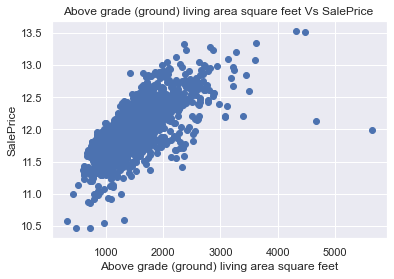

In [232]:
plt.scatter(train["GrLivArea"],train["SalePrice"])
plt.title("Above grade (ground) living area square feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Above grade (ground) living area square feet");

Dans cette deuxième partie des traitements des valeurs extrèmes, nous allons utiliser un test d'observations des valeurs extremes en utilisant la méthode de Bonferroni et ses p values

In [609]:
import statsmodels.api as sm
ols = sm.OLS(y.to_numpy().reshape(-1), X[numerics].to_numpy())
fit = ols.fit()
test2 = fit.outlier_test()

In [322]:
test3 = pd.DataFrame(test2)
test3.loc[test3[2]<1e-4]

,0,1,2
30,-7.028518,3.231961e-12,4.712198e-09
495,-7.398086,2.355107e-13,3.433746e-10
631,-7.103539,1.917730e-12,2.796050e-09
967,-5.870614,5.398333e-09,7.870770e-06


Nous supprimons les outliers qui permettent d'améliorer notre modèle

In [19]:
#outliers = [30, 410, 462, 495, 587, 631,811,915,967,1322, 1451]
outliers = [30, 88, 462, 631, 1322]
#outliers = [30, 88, 462, 495, 631, 967, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])
y.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

Dans cette dernière partie, nous utilisons la technique du Z-Score qui consiste à retrancher à la modalité la moyenne de la variable divisé par son écart type.
si la valeure absolue de ce score est supérieur au seuil déterminé (ici 5), alors celui çi est considéré comme une valeure extrème.

In [20]:
outliers2 = []
#thresold 5
def detect_outlier(data, el):
    threshold = 6
    mean = np.mean(data[el])
    std = np.std(data[el])
    
    for i in data[el]:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            ind = data.loc[(data[el] == i)].index
            outliers2.append(ind)
    return outliers2

In [21]:
liste_outlier = X[['LotFrontage', 'LotArea', 'MasVnrArea',  'BsmtFinSF1' , 'BsmtFinSF2'  , 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF', 
                         '2ndFlrSF','GrLivArea' , 'GarageArea' , 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF','BedroomAbvGr' ,'KitchenAbvGr',
                        'ScreenPorch', 'OverallQual' , 'OverallCond', 'TotalSF',  'Total_sqr_footage' ,'Total_Bathrooms', 'Total_porch_sf', 'GarageCars']]

for el in liste_outlier.columns:
    outliers_pt = detect_outlier(liste_outlier, el)

outliers_propre = []
for el in outliers_pt:
    for ele in el:
        if ele not in outliers_propre:
            outliers_propre.append(ele)

In [149]:
len(outliers_propre)

8

In [22]:
for el in outliers_propre:
    X = X.drop([el])
    y = y.drop([el])

# Machine Learning

## XG BOOST

L’algorithme de boosting de gradient (en anglais, gradient boosting) figure aussi parmi les méthodes de boosting très appréciées, surtout XG BOOST. Le boosting de gradient travaille par ajout séquentiel de prédicteurs à un ensemble, chacun d’eux corrigeant son prédécesseur. Cependant, au lieu de modifier légèrement les poids des observations à chaque itération comme le fait AdaBoost, cette méthode tente d’ajuster un nouveau prédicteur aux erreurs résiduelles du prédicteur précédent.

XG BOOST est donc un algorithme d'apprentissage supervisé dont le principe et de combiner les résultats d'un ensemble de modèles plus simple et plus faible afin de fournir une meilleure prédiction. L'idée est donc simple: au lieu d'utiliser un seul modèle, l'algorithme va en utiliser plusieurs qui serons ensuite combinés pour obtenir un seul résultat. l'algorithme travaille de manière séquentielle, contrairement à l'exemple de Random Forest. Cete façon de faire va le rendre plus prêt bien sur mais il va surtout permettre à l'algorithme de s'améliorer par capitalisation par rapport aux exécutions précédentes. Il commence donc par construire un premier modèle qu'il va bien sur évaluer. A partir de cette première évaluation, chaque individu va être alors pondéré en fonction de la performance de la prédiction

### Modèle XG BOOST

In [23]:
xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,  loss='huber',
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

In [24]:
xgb = xgboost.fit(X,y)

### Réduction de dimensionalité avec XG BOOST

Dans notre modèle nous avons beaucoup de features (plus de 300), certaines n'ont pas un poid important dans notre algotihme et conduise l'algorithme à faire du surapprentissage. En réduisant notre nombre de feature en prenant les variables dont le poid est supérieur à 3 (LotArea possède un score/poid de 1556 c'est la variable la plus importante de notre modèle), nous améliorons notre score de prédictions. Dans notre jeux de donnée final, nous avons 249 variables.

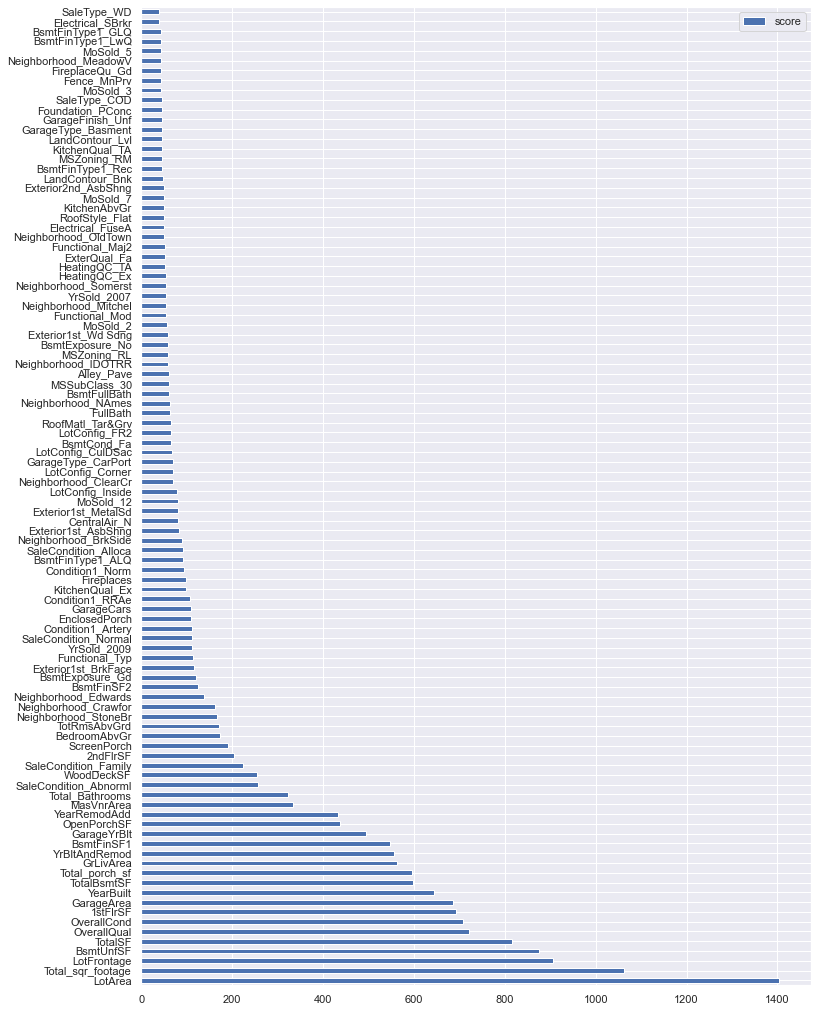

In [25]:
feature_important = xgboost.get_booster().get_score(importance_type='weight')
#rnd_search.best_estimator_.get_booster().get_score()
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by='score', ascending=False)
fig, ax = plt.subplots(figsize=(12,18))
data.iloc[: 100].plot(kind='barh', ax=ax)
#data.plot(kind='barh', ax=ax)

In [26]:
a = data.loc[data.score >= 3].index.to_list()

len(a)

X_new = X[a]
X_sub_new = X_sub[a]

xgb = xgboost.fit(X_new,y)

### Tuner nos parametres XG BOOST avec RandomizedSearch

L'idée étais de trouver des meilleure parametres que précèdement en utilisant différentes plages de parametres à tester. Cependant les différentes itérations n'ont pas permit de trouver un meilleure modèle.

In [1062]:
# A ne pas lancer car long temps de traitement

param_distribs = {
        'n_estimators': randint(low=1, high=5000),
        'max_features': randint(low=1, high=249), 
        "learning_rate"    : [0.005, 0.001, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ,0.50,0.6, 0.8] ,
         "max_depth"        : [ 1,3, 4, 5, 6, 8, 10, 12, 15],
         "min_child_weight" : [ 1, 3, 5, 7 ,10],
         "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,0.5, 1, 1.5, 2, 5 ],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.9 ] ,
           }

xgb_reg = XGBRegressor(random_state=42)
rnd_search = RandomizedSearchCV(xgb_reg, param_distributions=param_distribs, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_new, y, eval_metric=["error", "rmse"])

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                                        'max_depth': [1, 3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'max_featur

In [1066]:
rnd_search.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.25, max_delta_step=0, max_depth=5, max_features=2,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=3844, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [1067]:
rnd_search.best_score_

-0.09471415495340554

### Score XGBOOST

In [258]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model, X=X_new):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return (rmse)

In [256]:
len(X_new),len(y)

(1443, 1443)

In [259]:
score = cv_rmse(xgb)

print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

Xgboost score: 0.2726 (0.0211)
 2020-08-23 01:22:39.493238


### Tuner nos paramêtres XG BOOST avec l'optimisation Bayésienne

L'optimisation Bayesian est une suite de techniques souvent utilisées pour régler les hyperparamètres. Plus généralement, l'optimisation Bayesian peut être utilisée pour optimiser n'importe quelle fonction de boîte noire. A chaque étape, nous déterminons quel est le meilleur point à évaluer en fonction de la fonction d'acquisition en l'optimisant. Nous mettons ensuite à jour notre modèle et répétons ce processus pour déterminer le point suivant à évaluer.

Généralement, on obtient des meilleures performances du modèles comparée au Grid/Randomized Search. Ici les prédictions sont meilleure que le RandomizedSearch mais ne surpasse pas le premier modèle.

In [356]:
dtrain = xgbm.DMatrix(X_new, label=y)

In [481]:
params={}
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,

              'subsample': 0.8,
              
              'eta': 0.1,
              'colsample_bytree': 0.7,
               
              'nthread':-1,
              'eval_metric': 'rmse',
              
              'booster' :  'gblinear',
              'objective' :'reg:squarederror', #'logistic regression'
             'seed' : 27
             }
        
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    
    cv_result = xgbm.cv(params, dtrain, num_boost_round=100, nfold=6, early_stopping_rounds = 100)
                    
    
    return  -1 * cv_result['test-rmse-mean'].iloc[-1]

In [486]:
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (1, 10),
                                            'gamma': (0, 1),
                                            
                                             'learning_rate':(0, 0.4),
                                             'n_estimators':(4800,5500)                                           
                                            })

In [487]:
xgb_bo.maximize(n_iter=15, init_points=5, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.275    |  0.0267   |  0.3248   |  8.569    |  4.853e+0 |
|  2        | -0.2756   |  0.8818   |  0.3676   |  5.525    |  5.223e+0 |
|  3        | -0.2744   |  0.9831   |  0.2495   |  5.665    |  4.947e+0 |
|  4        | -0.2736   |  0.1264   |  0.1449   |  9.783    |  5.168e+0 |
|  5        | -0.2741   |  0.3216   |  0.2199   |  3.603    |  5.273e+0 |
|  6        | -0.2758   |  0.2219   |  0.3896   |  8.993    |  5.5e+03  |
|  7        | -0.2742   |  0.04529  |  0.2309   |  3.302    |  4.8e+03  |
|  8        | -0.2734   |  0.9797   |  0.06584  |  1.001    |  4.8e+03  |
|  9        | -0.2739   |  0.6637   |  0.1558   |  9.234    |  4.8e+03  |
|  10       | -0.2755   |  0.007281 |  0.3747   |  2.719    |  4.8e+03  |
|  11       | -0.2736   |  0.613    |  0.1155   |  9.417    |  4.8e+03  |
|  12       | -0.2735   |  0.5929   | 

In [484]:
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])
xgb_bays = XGBRegressor(**params).fit(X_new, y)

### Visualisation XG BOOST Over/under Fit

Ici, nous utilisons le early stopping qui est une approche permettant de former des modèles d'apprentissage automatique complexes pour éviter le surajustement.

Il fonctionne en surveillant les performances du modèle en cours d'entraînement sur un ensemble de données de test distinct et en arrêtant la procédure d'entraînement une fois que les performances sur l'ensemble de données de test ne se sont pas améliorées après un nombre fixe d'itérations d'apprentissage (ici 10).

Cela évite le surajustement en essayant de sélectionner automatiquement le point d'inflexion où les performances sur l'ensemble de données de test commencent à diminuer tandis que les performances sur l'ensemble de données d'entraînement continuent de s'améliorer à mesure que le modèle commence à surajustement.

Le premier graphique montre la perte du rmse du modèle XGBoost pour chaque époque sur les ensembles de données d'apprentissage et de test.
Le deuxième graphique montre l'erreur de régression du modèle XGBoost pour chaque époque sur les ensembles de données d'entraînement et de test.

Nous pouvons constater que le RMSE sur nos donnée test et sur donnée train sont assez similaire même si les résultats de nos données d'entrainement sont meilleure, d'après le graphique notre modèle n'est pas trop en surapprentissage. Les résultats ne s'améliorent plus au bout de la 900ème itération environ.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=7)
#eval_set = [(X_train, y_train), (X_test, y_test)]
xgboost.fit(X_train, y_train, early_stopping_rounds=10, eval_metric=["error", "rmse"], eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)
y_pred = xgboost.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = mean_squared_error(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy))

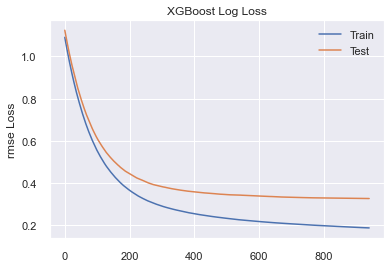

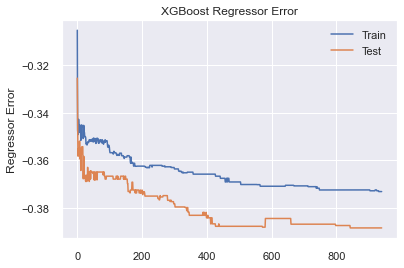

In [623]:
from matplotlib import pyplot
results = xgboost.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
#ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
#ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Regressor Error')
pyplot.title('XGBoost Regressor Error')
pyplot.figsize = (100, 100)
pyplot.show()

Lorsque l'on soumet notre modèle XG BOOST à nos données test, on obtient un score RMSE de $0.1184$ (soumission Kaggle). C'est notre meilleure modèle.

## LIGHTGBM

Le LIGHTGBM est un framework de boosting de gradient rapide, distribué et hautes performances basé sur des algorithmes d’arbre de décision. Il fais partit de la même famille que le XG Boost ou CATBOOST.

Ci dessous, le meilleure paramétrage qu'on à trouvé pour l'algorithme

### Modèle LGBM

In [29]:
lightgbm = LGBMRegressor(objective='huber', metric='huber',
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [30]:
lgbm2 = lightgbm.fit(X_new, y )

### GridSearch LGBM

Ici, nous avons définie des plages de valeurs à tester pour tuner les paramêtres de notre algorithme. Nous n'avons pas réussi à améliorer les performances.

In [358]:
# A ne pas lancer

lgb_test= LGBMRegressor(objective='huber', metric='huber',  max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,)

params = {"lgbm2__n_estimators": [25, 50, 100, 150, 200, 300,600,1000,2000,3000,4000,6000,7000,8500],
         "lgbm2__learning_rate": [0.001, 0.005, 0.01, 0.02,0.03,0.04,0.05,0.07,0.09, 0.1,0.25,0.5,0.75, 1.0],
         "lgbm2__num_leaves": [0,1,2,3,4,5,6,7,8,9,10,15,20,35,50]} 
        
searchCV = GridSearchCV(lgb_test, params, cv=5, refit=True)
searchCV.fit(X_new, y)

final_pipeline = searchCV.best_estimator_

rmse_grid_search_cv = cross_val_score(final_pipeline, X_new, y, scoring='neg_mean_absolute_error')

print('CV Mean Absolute Error with GridSearchCV: %2f' %(-1 * rmse_grid_search_cv.mean()))

CV Mean Absolute Error with GridSearchCV: 0.201200


### Réduction de mémoire / Renommage des datasets pour l'optimision 

En modifiant le type de données de chaque colonne, j'ai réduit l'utilisation de la mémoire. En prenant le minimum et le maximum de chaque colonne, la fonction attribue le type de données numériques optimal pour la colonne et change le type de données.

In [367]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [368]:
train= reduce_mem_usage(X_new)
test= reduce_mem_usage(X_sub_new)
X=train

Mem. usage decreased to  0.40 Mb (46.5% reduction)
Mem. usage decreased to  0.40 Mb (47.2% reduction)


### Optimisation Baysian LGBM

Dans ce cas aussi, l'optimisation Baysian n'a pas surperformé notre modèle.

In [369]:
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=5000, output_process=False):
    
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):  #feature_fraction, bagging_fraction, max_depth,
        params = {'objective':'huber', 'metric':'huber', 'boosting':'dart'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = 0.2
        params['bagging_fraction'] = 0.75
        params['max_depth'] = 7
        params['max_bin'] = 200
        params['feature_fraction_seed'] = 7
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['verbose'] = -1
        
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=False, verbose_eval =200, metrics=['rmse'])
        #return max(map(lambda x: x * -1, cv_result['rmse-mean']))
        return ( -1 * cv_result['rmse-mean'][-1]).max()
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (70, 200),
                                            #'feature_fraction': (0.1, 0.9),
                                            #'bagging_fraction': (0.8, 1),
                                            #'max_depth': (1, 30),
                                           
                                            'min_data_in_leaf': (100, 1000),
                                            'min_sum_hessian_in_leaf':(0,1),
                                           'subsample': (0.01, 1.0)}, random_state=200)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_rmse=[]
    for model in range(len( lgbBO.res)):
        model_rmse.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_rmse).idxmax()]['target'],lgbBO.res[pd.Series(model_rmse).idxmax()]['params']



In [372]:
opt_params_frmse2 = bayes_parameter_opt_lgb(X, y, init_round=20, opt_round=50, n_folds=5, random_seed=6, n_estimators=5000)

|   iter    |  target   | learni... | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------
|  1        | -0.3917   |  0.9482   |  303.9    |  0.5944   |  125.7    |  0.7665   |
|  2        | -0.8673   |  0.01283  |  421.7    |  0.9097   |  129.3    |  0.982    |
|  3        | -1.003    |  0.8687   |  987.4    |  0.9233   |  109.5    |  0.8476   |
|  4        | -1.003    |  0.13     |  807.0    |  0.2505   |  82.48    |  0.9441   |
|  5        | -0.4967   |  0.8278   |  566.5    |  0.8735   |  145.2    |  0.4556   |
|  6        | -0.4611   |  0.6834   |  477.5    |  0.6404   |  149.1    |  0.1144   |
|  7        | -1.003    |  0.9664   |  782.8    |  0.6796   |  112.8    |  0.03619  |
|  8        | -1.003    |  0.8056   |  975.5    |  0.2829   |  154.4    |  0.2729   |
|  9        | -0.5044   |  0.1958   |  477.1    |  0.666    |  137.3    |  0.8559   |
|  10       | -1.003    |  0.1793   |  980.3    |  0.3

### Visualisation LGBM Over/Under Fit

Nous pouvons constater que le RMSE sur nos donnée test et sur donnée train sont assez proche même si les résultats de nos données d'entrainement sont meilleure (0.2 contre 0.3), d'après le graphique notre modèle n'est pas trop en surapprentissage. Les résultats ne s'améliorent plus au bout de la 1900ème itération environ.

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.33 )
#eval_set = [(X_train, y_train), (X_test, y_test)]
lgbm2.fit(X_train2, y_train2, early_stopping_rounds=50, eval_metric=["error", "rmse"], eval_set=[(X_train2, y_train2), (X_test2, y_test2)], verbose=True)
y_pred = lgbm2.predict(X_test2)
predictions = [round(value) for value in y_pred]
accuracy = mean_squared_error(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy ))

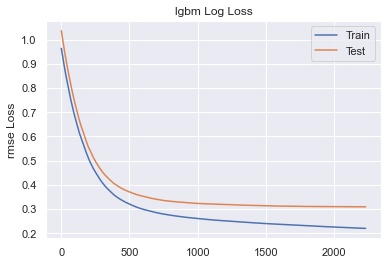

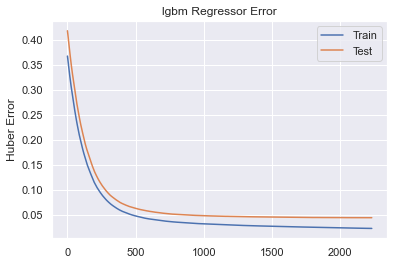

In [38]:
from matplotlib import pyplot
results = lgbm2.evals_result_
epochs = len(results['training']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['rmse'], label='Train')
ax.plot(x_axis, results['valid_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('rmse Loss')
pyplot.title('lgbm Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['training']['huber'], label='Train')
ax.plot(x_axis, results['valid_1']['huber'], label='Test')
ax.legend()
pyplot.ylabel('Huber Error')
pyplot.title('lgbm Regressor Error')
pyplot.figsize = (100, 100)
pyplot.show()

Lorsque l'on soumet notre modèle LGBM à nos données test, on obtient un score RMSE de $0.12020$ (soumission Kaggle)

## CATBOOST

CATBOOST est un algorithme de la famille des Gradient Boosting basé sur des arbres de décision. Ici nous utilisons la partie régréssion de l'algorithme.

### Modèle CATBOOST

In [65]:
cat = CatBoostRegressor(
    iterations=5000,
    depth=10,
    learning_rate=0.001,
    l2_leaf_reg= 0.1,#def=3
    loss_function='RMSE' ,
    eval_metric='RMSE',
    random_strength=0.001,
    #bootstrap_type='Bayesian',#Poisson (supported for GPU only);Bayesian;Bernoulli;No
    bagging_temperature=1,#for Bayesian bootstrap_type; 1=exp;0=1
    leaf_estimation_method='Newton', 
    leaf_estimation_iterations=2,
    boosting_type='Ordered' 
    ,feature_border_type='Median' 
    ,random_seed=1234
)

In [ ]:
model_cat2 = cat.fit(X_new, y)

### Visualisation CATBOOST Over/Under Fit

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.33 )
#eval_set = [(X_train, y_train), (X_test, y_test)]
cat.fit(X_train2, y_train2, early_stopping_rounds=50,  eval_set=[(X_train2, y_train2), (X_test2, y_test2)], verbose=True)
y_pred = cat.predict(X_test2)
predictions = [round(value) for value in y_pred]
accuracy = mean_squared_error(y_test2, predictions)
print("Accuracy: %.2f%%" % (accuracy ))

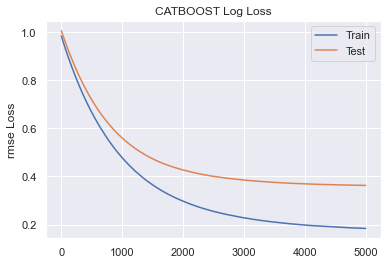

In [67]:
from matplotlib import pyplot
results = cat.evals_result_
epochs = len(results['learn']['RMSE'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['learn']['RMSE'], label='Train')
ax.plot(x_axis, results['validation_1']['RMSE'], label='Test')
ax.legend()
pyplot.ylabel('rmse Loss')
pyplot.title('CATBOOST Log Loss')
pyplot.show()

Lorsque l'on soumet notre modèle CATBOOST à nos données test, on obtient un score RMSE de $0.13225$ (soumission Kaggle). C'est notre moins bon modèle.

## Lasso Ridge BaysianRidge Elastic Net  / Volt

la régression ridge (appelée aussi régression de crête) est une version régularisée de la régression linéaire : un terme de régularisation est ajouté à la fonction de coût. Ceci force l’algorithme d’apprentissage non seulement à ajuster les données, mais aussi à maintenir les coefficients de pondération du modèle aussi petits que possible.

L’hyperparamètre $\alpha$ contrôle la quantité de régularisation que vous voulez imposer au modèle. Si $\alpha = 0$, on a tout simplement affaire à une régression linéaire. Si $\alpha$ est très grand, alors tous les coefficients de pondération finiront par avoir des valeurs très proches de zéro et le résultat sera une ligne horizontale passant par la moyenne des données.

La régréssion Lasso est aussi une régréssion régularisé, une caractéristique importante de la régression lasso est qu’elle tend à éliminer complètement les poids des variables les moins importantes (elle leur donne la valeur zéro).
Autrement dit, la régression lasso effectue automatiquement une sélection des variables et produit un modèle creux (sparse, en anglais), avec seulement quelques coefficients de pondération non nuls.

La régularisation _elastic net_ (que l’on peut traduire par «filet élastique») est un compromis entre ridge et lasso : le terme de régularisation est un simple mélange des termes de régularisation de ces deux régressions, ce mélange est contrôlé par le ratio de mélange (ou mix ratio) $r$: lorsque $r = 0$, elastic net équivaut à la régression ridge, et quand $r = 1$, c’est l’équivalent d’une régression lasso.

Dans cette partie, on utilise un gridsearch et une validation croisé pour tester les paramêtres de nos régrésseurs, ensuite on utilise les meilleures estimateurs.

A la fin, on utilise le VOLT Regressor qui est un méta-estimateur d'ensemble qui ajuste nos régresseurs chacun sur l'ensemble de données. Ensuite, il fait la moyenne des prédictions individuelles pour former une prédiction finale.

### Ridge

In [ ]:
ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(X_new,y)
print("The best value of Alpha is: ",ridge_reg.best_params_)
print("The best score achieved is: ",math.sqrt(-ridge_reg.best_score_))
ridge_pred=math.sqrt(-ridge_reg.best_score_)

In [165]:
ridge_reg_f = Ridge(alpha=16)
ridge_reg_f.fit(X_new,y)

Ridge(alpha=16)

Lorsque l'on soumet notre modèle Ridge à nos données test, on obtient un score RMSE de $0.12313$ (soumission Kaggle). Ce modèle Ridge va être le modèle ou l'on va mettre le plus de poids dans notre régréssion Volt (stacking) car c'est le meilleure modèle entre l'Elastic Net, le Baysian Ridge et le Lasso.

### Baysian Ridge

In [ ]:
# A ne pas lancer
bays_ridge = linear_model.BayesianRidge()
parameters= {'alpha_1':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
            'alpha_2':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4 ],
            'lambda_1':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4] ,
            'lambda_2':[1e-8, 1e-7, 1e-6, 1e-5, 1e-4 ]}

bays_ridge_reg= GridSearchCV(bays_ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
bays_ridge_reg.fit(X_new,y)
print("The best value of Alpha is: ",bays_ridge_reg.best_params_)
print("The best score achieved is: ",math.sqrt(-bays_ridge_reg.best_score_))
bays_ridge_pred=math.sqrt(-bays_ridge_reg.best_score_)

In [166]:
bays_ridge_reg = linear_model.BayesianRidge(alpha_1 = 1e-08, alpha_2= 0.0001, lambda_1 = 0.0001, lambda_2 = 1e-08, n_iter=1000)

bays_ridge_reg.fit(X_new,y)

C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BayesianRidge(alpha_1=1e-08, alpha_2=0.0001, lambda_1=0.0001, lambda_2=1e-08,
              n_iter=1000)

Lorsque l'on soumet notre modèle Baysian Ridge à nos données test, on obtient un score RMSE de $0.12314$ (soumission Kaggle). 

### Lasso

In [744]:
parameters= {'alpha':np.arange(0.0001,100 )}

lasso=Lasso()
lasso_reg=GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(X_new,y)

print('The best value of Alpha is: ',lasso_reg.best_params_)

The best value of Alpha is:  {'alpha': 0.0001}


In [338]:
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
lasso_reg_f = LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=20)
lasso_reg_f.fit(X_new,y)

C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                0.0008],
        cv=20, max_iter=10000000.0, random_state=42)

Lorsque l'on soumet notre modèle Lasso à nos données test, on obtient un score RMSE de $0.12437$ (soumission Kaggle). 

### Elastic net

In [168]:
alphas = [10,1,0.1,0.01,0.001,0.0001, 0.002,0.003,0.004,0.005,0.00054255]
l1ratio = [0.01, 0.001, 0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(X_new, y)

elastic_cv.alpha_

C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.00054255

Lorsque l'on soumet notre modèle Lasso à nos données test, on obtient un score RMSE de $0.12409$ (soumission Kaggle). 

### VOLT/ Stacking des régréssions linéaires

In [348]:
vote_mod = VotingRegressor([('Ridge', ridge_reg_f), ('BayesianRidge' , bays_ridge_reg), ('Lasso', lasso_reg_f), ('Elastic', elastic_cv)], 
                            weights=[2, 1.8, 0.7, 0.9])
vote= vote_mod.fit(X_new,y)
#vote_pred=vote.predict(x_test)

C:\Users\Hype\Anaconda3\envs\lab\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Lorsque l'on soumet notre modèle de stacking des régréssion linéaire, on obtient un score RMSE de 0.12314 (soumission Kaggle). Malheureusement il ne surpasse pas notre meilleure modèle.

### Visualisation de l'importance des features pour Lasso et Ridge

On peut constater que les features qui ont un poid le plus important dans notre régréssion Lasso sont:
- Exterior1st_BrkFace
- Neighborhood_Crawfor
- OverallQuall
- GrLivArea
- Saletype_Cod
- Salecondition_Abnorml
- Neighborhood_IDOTRR

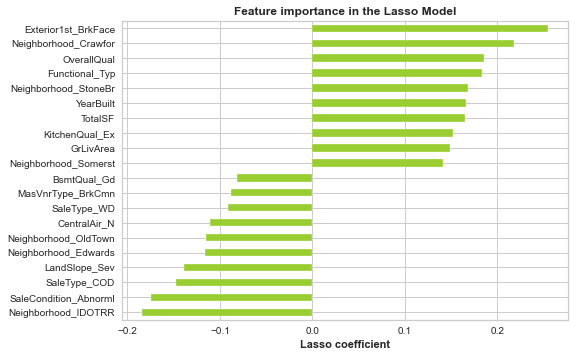

In [767]:
coefs = pd.Series(lasso_mod.coef_, index = X_new.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

On peut constater que les features qui ont un poid le plus important dans notre régréssion Ridge sont:
- Neighborhood_Crawfor
- OverallQuall
- OverallCond
- Total SF
- GrLivArea
- Neighborhood_Edwards
- Salecondition_Abnorml
- Neighborhood_IDOTRR

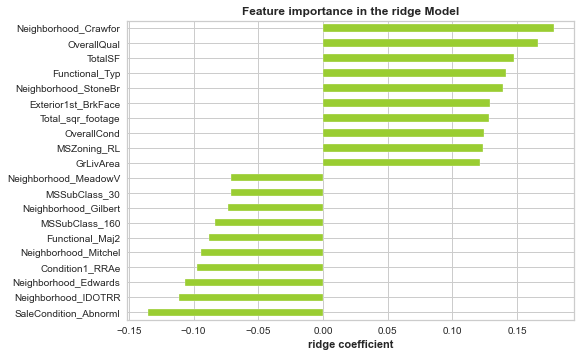

In [775]:
coefs = pd.Series(ridge_reg_f.coef_.reshape(-1), index = X_new.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("ridge coefficient", weight='bold')
plt.title("Feature importance in the ridge Model", weight='bold')
plt.show()

## PYCARET

PYCARET est une bibliothèque Python pour former et déployer des modèles d'apprentissage automatique supervisés et non supervisés dans un environnement à faible code.

Dans notre setup, nous avons encore une fois transformer toutes nos features y compris notre target en appliquant une normalisation à la Yéo Johnson dans le but d'optimiser nos résultats.

Ensuite, nous avons comparés les résultats des différents algorithme et nous avons pris les 5 meilleures modèles. Lorsque nous tunons automatiquement les modèles (fais avec un randomisedSearch), cela n'améliore pas le score de prédiction.

Ensembling est une autre technique courante pour améliorer les performances des modèles. Dans l'apprentissage automatique, ils combinent les décisions de plusieurs modèles pour améliorer les performances globales. Il existe différentes techniques d'assemblage que nous aborderons dans cette section. Ceux-ci incluent le Bagging et le Boosting. Nous utiliserons la fonction ensemble_model () en utilisons la méthode du Bagging pour notre modèle Huber car c'est le seul qui s'est améliorer un peu avec cette technique.

Ensuite nous avons stacker (empiler) tous nos modèle. L'empilement est une autre technique populaire d'assemblage, mais elle est moins couramment mise en œuvre en raison de difficultés pratiques. L'empilement est une technique d'apprentissage d'ensemble qui combine plusieurs modèles via un méta-modèle. Une autre façon de penser à l'empilement est que plusieurs modèles sont entraînés pour prédire le résultat et un méta-modèle est créé qui utilise les prédictions de ces modèles comme entrée avec les fonctionnalités d'origine.

stack_1 sera le modèle final de PYCARET.

In [353]:
x_new_pycaret = X_new.copy()
x_new_pycaret['SalePrice'] = y.copy()

In [365]:
exp_reg = setup(x_new_pycaret, target='SalePrice'  ,transformation = True,transform_target = True, remove_multicollinearity = True) #, transform_target = True, #feature_interaction=True, 
                 #remove_multicollinearity = True ) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,5788
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(1447, 250)"
4,Missing Values,False
5,Numeric Features,241
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Baysian Ridge

In [366]:
model_br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1986,0.0616,0.2482,0.9227,0.1381,-0.3570
1,0.1580,0.0432,0.2079,0.9563,0.1110,-0.0094
2,0.1715,0.0577,0.2401,0.9375,0.1346,-0.1455
3,0.1706,0.0604,0.2457,0.9332,0.1301,-0.3402
4,0.2090,0.0980,0.3130,0.9035,0.1512,0.2016
5,0.2062,0.0857,0.2928,0.9016,0.1485,-0.3666
6,0.2317,0.2192,0.4681,0.7212,0.2112,-0.7195
7,0.2217,0.1051,0.3242,0.8903,0.1587,-0.7012
8,0.2239,0.1165,0.3414,0.8858,0.1586,-0.2787
9,0.1629,0.0483,0.2198,0.9541,0.1097,0.1281


Ridge

In [367]:
model_r = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2107,0.0705,0.2655,0.9115,0.1531,-0.4678
1,0.1753,0.0543,0.2331,0.9450,0.1251,0.0677
2,0.1885,0.0639,0.2528,0.9307,0.1382,-0.1537
3,0.1819,0.0610,0.2470,0.9326,0.1312,-0.2619
4,0.2241,0.1167,0.3416,0.8851,0.1671,0.2393
5,0.2142,0.0934,0.3057,0.8927,0.1578,-0.5263
6,0.2550,0.2233,0.4725,0.7159,0.2170,-1.0282
7,0.2296,0.1134,0.3368,0.8816,0.1650,-0.5301
8,0.2463,0.1289,0.3590,0.8737,0.1689,-0.4446
9,0.1720,0.0573,0.2394,0.9456,0.1180,0.1212


Catboost

In [371]:
model_cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1906,0.0653,0.2556,0.9180,0.1330,-0.3190
1,0.1660,0.0658,0.2565,0.9335,0.1167,0.0139
2,0.1773,0.0679,0.2606,0.9264,0.1391,-0.0769
3,0.1732,0.0596,0.2442,0.9341,0.1201,-0.3347
4,0.2041,0.0948,0.3079,0.9066,0.1483,-0.5513
5,0.2036,0.0926,0.3044,0.8936,0.1547,-0.1378
6,0.2177,0.1840,0.4290,0.7659,0.1985,-0.7612
7,0.2078,0.1073,0.3275,0.8880,0.1527,-0.9586
8,0.2312,0.1400,0.3742,0.8628,0.1625,-0.3082
9,0.1714,0.0613,0.2475,0.9418,0.1253,0.1413


Kernel Ridge

In [368]:
model_kr = create_model('kr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2087,0.0688,0.2623,0.9136,0.1508,-0.4717
1,0.1732,0.0525,0.2291,0.9469,0.1228,0.0731
2,0.1902,0.0654,0.2558,0.9290,0.1396,-0.1489
3,0.1817,0.0611,0.2472,0.9324,0.1306,-0.2555
4,0.2248,0.1179,0.3434,0.8838,0.1683,0.2615
5,0.2155,0.0940,0.3065,0.8921,0.1591,-0.4990
6,0.2556,0.2260,0.4754,0.7124,0.2165,-1.0441
7,0.2285,0.1123,0.3351,0.8827,0.1651,-0.5560
8,0.2475,0.1305,0.3612,0.8721,0.1700,-0.4550
9,0.1730,0.0568,0.2383,0.9460,0.1183,0.1083


Hubert Regressor

In [369]:
model_hub = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1851,0.0587,0.2424,0.9263,0.1431,-0.5198
1,0.1750,0.0545,0.2335,0.9449,0.1174,0.1047
2,0.1844,0.0747,0.2734,0.9189,0.1402,-0.0847
3,0.1692,0.0516,0.2272,0.9430,0.1202,-0.3078
4,0.2163,0.1218,0.3490,0.8800,0.1671,-0.1583
5,0.2164,0.1007,0.3173,0.8844,0.1627,-0.5307
6,0.2568,0.2281,0.4776,0.7098,0.2123,-0.9846
7,0.2138,0.1040,0.3225,0.8914,0.1540,-0.8478
8,0.2287,0.1272,0.3566,0.8753,0.1635,-0.5565
9,0.1558,0.0466,0.2158,0.9558,0.1080,0.1036


Bagging Huber

In [370]:
bagged_hub = ensemble_model(model_hub , optimize='rmse')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1790,0.0519,0.2277,0.9349,0.1329,-0.6576
1,0.1797,0.0554,0.2354,0.9439,0.1193,0.0720
2,0.1815,0.0680,0.2608,0.9262,0.1339,-0.0740
3,0.1693,0.0550,0.2346,0.9392,0.1227,-0.3047
4,0.2126,0.1153,0.3396,0.8864,0.1664,-0.3407
5,0.2136,0.1004,0.3169,0.8847,0.1601,-0.4541
6,0.2459,0.2213,0.4705,0.7184,0.2108,-1.0124
7,0.2060,0.0969,0.3113,0.8988,0.1530,-0.6424
8,0.2300,0.1222,0.3496,0.8802,0.1599,-0.4425
9,0.1597,0.0469,0.2165,0.9555,0.1068,0.0736


stacking

In [372]:
stack_1 = stack_models([model_br,model_cat,bagged_hub,model_kr,model_r], meta_model = model_br, restack = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1811,0.0548,0.2341,0.9312,0.1275,-0.4109
1,0.1598,0.0508,0.2254,0.9486,0.1089,0.0140
2,0.1596,0.0586,0.2420,0.9365,0.1297,-0.0993
3,0.1609,0.0524,0.2290,0.9420,0.1157,-0.3246
4,0.1978,0.0955,0.3091,0.9059,0.1483,-0.3381
5,0.1940,0.0857,0.2928,0.9016,0.1463,-0.4266
6,0.2213,0.2062,0.4541,0.7376,0.2049,-0.8271
7,0.2061,0.0981,0.3133,0.8975,0.1499,-0.5459
8,0.2133,0.1179,0.3434,0.8844,0.1554,-0.3291
9,0.1544,0.0452,0.2125,0.9571,0.1103,0.1327


En utilisant l'option tune_model de PYCARET qui consisite à optimiser les parametres du modèle à travers un GridSearchCV, nous n'avons pas à augmenter les performances des modèles.

In [539]:
tuned_br =  tune_model(model_hub, optimize='RMSE', n_iter = 50, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1795,0.0565,0.2377,0.9291,0.1396,-0.5338
1,0.1708,0.0536,0.2315,0.9458,0.1153,0.0553
2,0.1757,0.0698,0.2642,0.9243,0.1380,-0.0498
3,0.1676,0.0519,0.2278,0.9426,0.1201,-0.2857
4,0.2101,0.1137,0.3372,0.8880,0.1609,-0.2228
5,0.2092,0.0928,0.3047,0.8934,0.1540,-0.5656
6,0.2508,0.2236,0.4729,0.7155,0.2151,-0.9427
7,0.2059,0.1018,0.3190,0.8937,0.1518,-0.8186
8,0.2194,0.1197,0.3460,0.8827,0.1518,-0.4311
9,0.1527,0.0440,0.2097,0.9582,0.1060,0.0998


### Visualisation Modèle Bridge (meilleure des estimateurs des modèles PYCARET)

Dans cette partie, nous prenons notre meilleure modèle (baysian ridge) et nous interprétons certains graphiques.

On peut voir dans la courbe d'apprentissage (Learning Curve) que le score de notre jeux d'entrainement (0.95) et de notre jeux de validation (0.92) sont très proche, et que celle-çi s'est arrétté de s'améliorer à partir de la 900ème itération. On peut penser que le modèle n'overfit pas trop.

Pour la partie sur la prédictions des erreurs (prédiction error plot), on remarque que le résidus fit plutôt bien sur la droite de régression. Le bruit n'est pas éparpillé partout, nous avons seulement 2 observations qui sont un peu éloigné de la droite. On peu penser que l'on à pas ou très peu d'hétéroscédasticité.

En cluesterant nos donnée avec 50 features (Manifold Learning), on peut assez facilement distinguer des groupes. A gauche, on a le premier groupe (points bleu foncés, entre 3 et 1), au centre on a le deuxième groupe (les points claire entre 1 et -1) et à droite on a le dernier groupe (points rouge foncé < -2 ).

Concernant l'importance de nos features (feature importance), on constate que les 10 features les plus importantes pour ce modèle sont : OverallQual, Total_sqr_footage, Neighborhood_Crawfor, Functional_Typ, TotalSF, SaleCondition_Abnorml, Condition 1_norm, GrLivArea, OverallCond et Neighborhood_StoneBr.


In [538]:
evaluate_model(model_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Lorsque l'on soumet notre modèle PYCARET à nos données test, on obtient un score RMSE de $0.12374$ (soumission Kaggle)

## Modèle Final Stacking

### Stacking

Ici nous allons utliser la technique du Stacking qui est une méthode d'ensemble permettant de combiner tous nos modèles précèdent.

Les méthodes d'ensemble sont des méta-algorithmes qui combinent plusieurs techniques d'apprentissage automatique en un seul modèle prédictif afin de réduire la variance (bagging), le biais (boosting) ou d'améliorer les prédictions (stacking).

Le stacking est une technique d'apprentissage d'ensemble qui combine plusieurs modèles de classification ou de régression via un méta-classificateur ou un méta-régresseur.

Le stacking (l'empilement) atteint en général une précision plus élevée que les régréssion individuels et, sur la base des courbes d'apprentissage, il ne montre aucun signe de surapprentissage.

In [408]:
stack_gen_final = StackingCVRegressor(regressors=(xgb, lgbm2, model_cat2, ridge_reg_f,bays_ridge_reg,lasso_reg_f,elasticmod ),
                                meta_regressor=xgb,
                                use_features_in_secondary=True)

In [ ]:
# A ne pas lancer, très long
stack_gen_model_final = stack_gen_final.fit(np.array(X_new), np.array(y))

### Blend All

Dans cette partie, on va mixer tous nos modèle en leur attribuant un poid plus ou moins important. Bien évidemment, nous donnons un poids plus important à notre modèle stack_gen_model_final qui est le plus performant.

In [492]:
def blend_models_predict(X):
    p_pycaret = predict_model(stack_1, data=X_sub_new )
    p_py = np.array(p_pycaret['Label'])
    return (
            (0.25 * xgb.predict(X_sub_new)) + \
            (0.10 * p_py) + \
            (0.15 * lgbm2.predict(X_sub_new)) + \
            (0.10 * vote.predict(X_sub_new))+ \
            (0.40 * stack_gen_model_final.predict(np.array(X_sub_new))))

# Soumission

Ici on applique notre modèle final de machine learning sur nos donnée test, puis on inverse la transformation de nos prédiction (normalisation + logarithme) pour récupérer les bonnes valeurs puis on insère nos résultats final dans un fichier CSV. Dans l'ensemble notre modèle surestime les prédictions et à du mal à estimer les valeurs extrèmes. C'est pourquoi par une approche un peu brutal, on diminue un peu les prédictions ce qui améliore un petit peu le score de notre modèle (0.0003)

In [493]:
pred_f = blend_models_predict(X_sub_new)

In [494]:
hf = pred_f.reshape(-1,1)
hf2 = pt.inverse_transform(hf)
fin = hf2
fin = np.expm1(fin)

In [536]:
FINAL = pd.DataFrame(fin, columns=['SalePrice'])
FINAL['Id'] = test_ID
FINAL = FINAL[['Id', 'SalePrice']]

q1 = FINAL['SalePrice'].quantile(0.008)

FINAL['SalePrice'] = FINAL['SalePrice'].apply(lambda x: x if x > q1 else x*0.85)
FINAL['SalePrice'] = round(FINAL['SalePrice'])
FINAL

,Id,SalePrice
0,1461,125834.0
1,1462,164978.0
2,1463,185871.0
3,1464,199053.0
4,1465,192868.0
...,...,...
1454,2915,82577.0
1455,2916,80014.0
1456,2917,170049.0
1457,2918,116511.0


In [537]:
FINAL.to_csv( 'C:/Users/Hype/ 202027082 kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv', index=False)

Voila nous avons réussie à obtenir un score $ RMSE$ de $0.11456 $ ce qui nous confère la $88 ème$ place du classement  (top 1%)  parmis les 5134 participants. Notre dernier modèle de stacking est le meilleure des modèles ou celui-çi obtient un score de 0.11790 et avec le blender de tous les modèles réunis nous arrivons au score de de 0.11456.